Year                  0
Month                 0
Day                   1
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
Fill Flag             0
GHI                   0
Ozone                 0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
POA                   0
Power generated       0
Hydrogen              0
dtype: int64
Epoch 1/300


/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


205/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.6011 - mae: 5.0639 - mse: 101.2203

/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 103.2116 - mae: 5.0624 - mse: 100.8350 - val_loss: 81.2231 - val_mae: 4.3235 - val_mse: 79.0172 - learning_rate: 1.0000e-04
Epoch 2/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68.9695 - mae: 4.4775 - mse: 66.8100 - val_loss: 36.1236 - val_mae: 3.7101 - val_mse: 34.0899 - learning_rate: 1.0000e-04
Epoch 3/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.9288 - mae: 3.4286 - mse: 36.9300 - val_loss: 15.2130 - val_mae: 2.4301 - val_mse: 13.3077 - learning_rate: 1.0000e-04
Epoch 4/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.9036 - mae: 2.5464 - mse: 20.0240 - val_loss: 7.6811 - val_mae: 1.5220 - val_mse: 5.8718 - learning_rate: 1.0000e-04
Epoch 5/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3893 - mae: 1.8874 - mse: 10.6001 - val_loss: 4.9872 - val_mae: 1.0879 - val_mse: 3.2526 - learning_rate: 1.0000e-04
Epoch 6/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7339 - mae: 1.6515 - mse: 8.0151 - v

/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


 1/55 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step

/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 
Mean Squared Error (Transformer): 0.3380168080329895
R^2 Score (Power Generated, Transformer): 0.9978811414387323
R^2 Score (Hydrogen, Transformer): 0.9707560717788394
MAPE (Power Generated, Transformer): 14.275599373959407
MAPE (Hydrogen, Transformer): 38.383527099841366


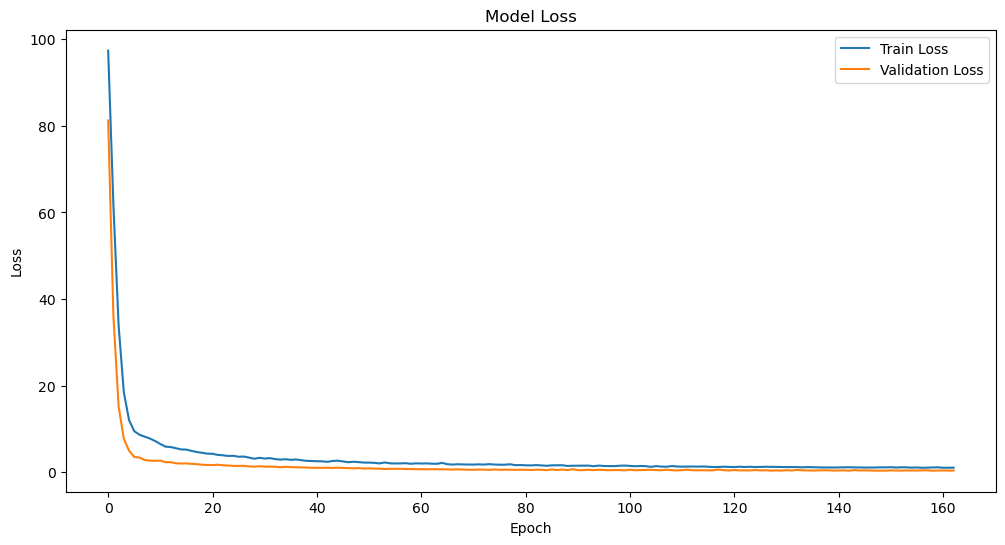

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted Power Generated (Transformer): 31.491641998291016
Predicted Hydrogen Production (Transformer): 0.5765752196311951


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, GaussianNoise, BatchNormalization, Input
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Add, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import MaxNorm

# Load the dataset
data = pd.read_csv('solar_data_new_hydrogen.csv')

# Check for missing values
print(data.isnull().sum())

# Separate features and target variables
features = data.drop(columns=['Power generated', 'Hydrogen'])
target = data[['Power generated', 'Hydrogen']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Reshape features for LSTM input (samples, time steps, features)
features_reshaped = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.2, random_state=42)

# Define Transformer Encoder Layer
class TransformerEncoderLayer(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"), 
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def compute_output_shape(self, input_shape):
        return input_shape

# Build the model with Transformer Encoder Layers
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = GaussianNoise(0.1)(input_layer)

# Transformer Encoder Layers
transformer_layer = TransformerEncoderLayer(embed_dim=X_train.shape[2], num_heads=2, ff_dim=64, rate=0.1)
x = transformer_layer(x, training=True)
x = transformer_layer(x, training=True)  # Adding multiple transformer layers

x = LSTM(50, activation='relu', return_sequences=True, kernel_regularizer=l2(0.02), kernel_constraint=MaxNorm(3))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Attention Layer
attention = MultiHeadAttention(num_heads=2, key_dim=X_train.shape[2])(x, x)
x = Add()([x, attention])
x = LayerNormalization(epsilon=1e-6)(x)
x = LSTM(50, activation='relu', kernel_regularizer=l2(0.02), kernel_constraint=MaxNorm(3))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(20, activation='relu')(x)
output_layer = Dense(2)(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
mse_transformer, _, mae_transformer = model.evaluate(X_test, y_test, verbose=0)
y_pred_transformer = model.predict(X_test)
r2_power_transformer = r2_score(y_test['Power generated'], y_pred_transformer[:, 0])
r2_hydrogen_transformer = r2_score(y_test['Hydrogen'], y_pred_transformer[:, 1])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

mape_power_transformer = mean_absolute_percentage_error(y_test['Power generated'], y_pred_transformer[:, 0])
mape_hydrogen_transformer = mean_absolute_percentage_error(y_test['Hydrogen'], y_pred_transformer[:, 1])

print(f'Mean Squared Error (Transformer): {mse_transformer}')
print(f'R^2 Score (Power Generated, Transformer): {r2_power_transformer}')
print(f'R^2 Score (Hydrogen, Transformer): {r2_hydrogen_transformer}')
print(f'MAPE (Power Generated, Transformer): {mape_power_transformer}')
print(f'MAPE (Hydrogen, Transformer): {mape_hydrogen_transformer}')

# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Sample new input
new_input = {
    'Year': 2016,
    'Month': 1,
    'Day': 1,
    'Hour': 12,
    'Minute': 30,
    'Temperature': 28.1,
    'Clearsky DHI': 153,
    'Clearsky DNI': 833,
    'Clearsky GHI': 810,
    'Cloud Type': 0,
    'Dew Point': 22,
    'DHI': 153,
    'DNI': 833,
    'Fill Flag': 0,
    'GHI': 810,
    'Ozone': 0.223,
    'Relative Humidity': 69.33,
    'Solar Zenith Angle': 37.89,
    'Surface Albedo': 0.08,
    'Pressure': 1010,
    'Precipitable Water': 2.8,
    'Wind Direction': 55,
    'Wind Speed': 3.5,
    'POA': 904.03
}

# Convert new input to DataFrame
new_input_df = pd.DataFrame([new_input])

# Impute missing values in new input
new_input_imputed = imputer.transform(new_input_df)

# Normalize the new input
new_input_scaled = scaler.transform(new_input_imputed)

# Reshape for LSTM input
new_input_reshaped = new_input_scaled.reshape(1, 1, new_input_scaled.shape[1])

# Predict with the Transformer model
new_prediction_transformer = model.predict(new_input_reshaped)
print(f'Predicted Power Generated (Transformer): {new_prediction_transformer[0][0]}')
print(f'Predicted Hydrogen Production (Transformer): {new_prediction_transformer[0][1]}')
